# Distribution Objects

Distribution objects represent probability distributions. You can call `rand` to sample from them and `pdf` to evaluate the probability. They can be found in the `Distributions.jl` and `POMDPModelTools.jl` packages.

In [1]:
using Distributions: rand, pdf
using POMDPModelTools: SparseCat # Sparse categorical distribution

In [2]:
d = SparseCat(["one", "two"], [0.8, 0.2])

                   SparseCat distribution           
         ┌                                        ┐ 
   "one" ┤■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 0.8   
   "two" ┤■■■■■■■■■ 0.2                             
         └                                        ┘ 

In [3]:
[rand(d) for _ in 1:10]

10-element Vector{String}:
 "one"
 "one"
 "one"
 "one"
 "one"
 "one"
 "one"
 "one"
 "one"
 "one"

In [4]:
pdf(d, "one"), pdf(d, "two")

(0.8, 0.2)

# POMDPs.jl

In [4]:
using POMDPs
using POMDPModels: SimpleGridWorld
using POMDPModelTools: render

In [5]:
m = SimpleGridWorld()

SimpleGridWorld
  size: Tuple{Int64, Int64}
  rewards: Dict{StaticArrays.SVector{2, Int64}, Float64}
  terminate_from: Set{StaticArrays.SVector{2, Int64}}
  tprob: Float64 0.7
  discount: Float64 0.95


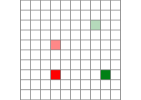

In [6]:
render(m)

# Interacting with POMDPs.jl models

You can access all of the members of the $(S, A, R, T, \gamma, b)$ tuple with the following functions:

In [7]:
states(m)

101-element Vector{StaticArrays.SVector{2, Int64}}:
 [1, 1]
 [2, 1]
 [3, 1]
 [4, 1]
 [5, 1]
 [6, 1]
 [7, 1]
 [8, 1]
 [9, 1]
 [10, 1]
 [1, 2]
 [2, 2]
 [3, 2]
 ⋮
 [10, 9]
 [1, 10]
 [2, 10]
 [3, 10]
 [4, 10]
 [5, 10]
 [6, 10]
 [7, 10]
 [8, 10]
 [9, 10]
 [10, 10]
 [-1, -1]

In [8]:
actions(m) # things that begin with a colon (:) are called "Symbols"; they are short interned strings

(:up, :down, :left, :right)

In [9]:
reward(m, [4,3], :right) # reward(m, s, a)

-10.0

In [10]:
transition(m, [1,1], :right)

                      SparseCat distribution           
            ┌                                        ┐ 
     [1, 1] ┤■■■■■■■■■■ 0.20000000000000004            
     [1, 2] ┤■■■■■ 0.10000000000000002                 
   [-1, -1] ┤ 0.0                                      
   [-1, -1] ┤ 0.0                                      
     [2, 1] ┤■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 0.7   
            └                                        ┘ 

In [11]:
[@gen(:sp, :r)(m, [1,1], :right) for _ in 1:10]

10-element Vector{Tuple{StaticArrays.SVector{2, Int64}, Float64}}:
 ([2, 1], 0.0)
 ([2, 1], 0.0)
 ([2, 1], 0.0)
 ([2, 1], 0.0)
 ([2, 1], 0.0)
 ([2, 1], 0.0)
 ([1, 2], 0.0)
 ([2, 1], 0.0)
 ([2, 1], 0.0)
 ([2, 1], 0.0)

In [12]:
discount(m)

0.95

In [13]:
initialstate(m)

POMDPModels.GWUniform((10, 10))

# Running Simulations

In [14]:
using POMDPSimulators: HistoryRecorder
using POMDPPolicies: FunctionPolicy

In [15]:
function policy_function(s)
    rand(actions(m))
end

policy_function (generic function with 1 method)

In [16]:
history = simulate(HistoryRecorder(max_steps=100), m, FunctionPolicy(policy_function))

17-element POMDPSimulators.SimHistory{NamedTuple{(:s, :a, :sp, :r, :info, :t, :action_info), Tuple{StaticArrays.SVector{2, Int64}, Symbol, StaticArrays.SVector{2, Int64}, Float64, Nothing, Int64, Nothing}}, Float64}:
 (s = [5, 3], a = :right, sp = [6, 3], r = 0.0, info = nothing, t = 1, action_info = nothing)
 (s = [6, 3], a = :left, sp = [6, 2], r = 0.0, info = nothing, t = 2, action_info = nothing)
 (s = [6, 2], a = :right, sp = [7, 2], r = 0.0, info = nothing, t = 3, action_info = nothing)
 (s = [7, 2], a = :up, sp = [7, 3], r = 0.0, info = nothing, t = 4, action_info = nothing)
 (s = [7, 3], a = :up, sp = [7, 4], r = 0.0, info = nothing, t = 5, action_info = nothing)
 (s = [7, 4], a = :right, sp = [8, 4], r = 0.0, info = nothing, t = 6, action_info = nothing)
 (s = [8, 4], a = :right, sp = [7, 4], r = 0.0, info = nothing, t = 7, action_info = nothing)
 (s = [7, 4], a = :up, sp = [7, 5], r = 0.0, info = nothing, t = 8, action_info = nothing)
 (s = [7, 5], a = :left, sp = [6, 5], r =

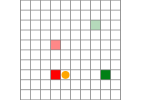

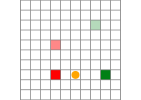

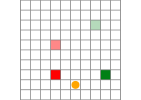

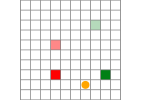

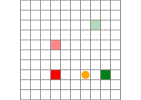

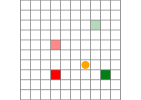

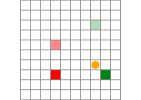

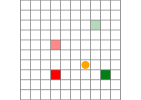

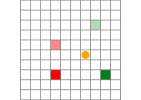

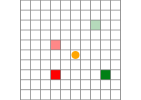

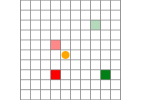

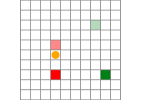

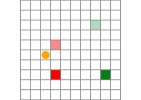

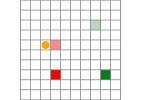

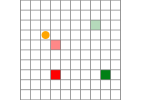

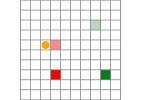

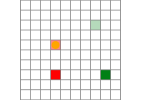

In [17]:
for step in history
    display(render(m, step))
end

In [19]:
using Interact

@manipulate for t in 1:length(history)
    render(m, history[t])
end

WebIO._IJuliaInit()

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["t"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 17, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
9, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/zach/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/zach/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/zach/.julia/packages/InteractBase/o1I6G/src/../assets/all.js"), Asset("css", nothing, "/home/zach/.julia/packages/InteractBase/o1I6G/src/../assets/style.css"), Asset("css", nothing, "/home/zach/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f729ab8a850, Task (runnable) @0x00007f729ab8a850), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"5859870282915320748\",\"id\":\"15660733862006545665\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"i

# Monte Carlo Evaluation

In [18]:
using POMDPSimulators: RolloutSimulator
using Statistics: mean, std
using Plots: histogram

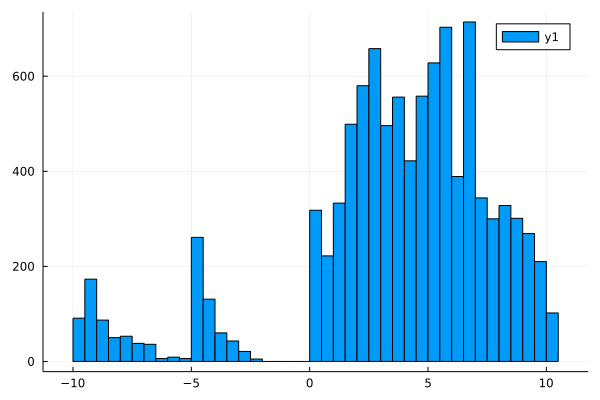

Mean reward (± 3 sem): 3.6138517057243416 ± 0.12927869692438057


In [23]:
function policy_function(s)
    if s[1] < 9
        return :right
    elseif s[2] > 3
        return :down
    else
        return :left
    end
end

m_simulations = 10_000
uhats = [simulate(RolloutSimulator(max_steps=100), m, FunctionPolicy(policy_function)) for _ in 1:m_simulations]
display(histogram(uhats))
println("Mean reward (± 3 sem): $(mean(uhats)) ± $(3*std(uhats)/sqrt(m_simulations))")

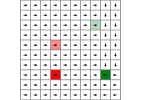

In [24]:
render(m, policy=FunctionPolicy(policy_function))

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


(Extra text to keep from automatically scrolling up when the graph is re-rendered)









